# WEEK 4

In this section consider the 3D points
$$
\boldsymbol{Q}_{i j k}=\left[\begin{array}{l}
i \\
j \\
k
\end{array}\right]
$$
where $i=0,1, j=0,1$, and $k=0,1$. Consider also a camera with $f=1000$ and a resolution of $1080 \times 1920$. Furthermore, the camera is transformed such that
$$
\boldsymbol{R}=\left[\begin{array}{ccc}
\sqrt{1 / 2} & -\sqrt{1 / 2} & 0 \\
\sqrt{1 / 2} & \sqrt{1 / 2} & 0 \\
0 & 0 & 1
\end{array}\right] \text { and } \boldsymbol{t}=\left[\begin{array}{lll}
0 & 0 & 10
\end{array}\right]
$$

In [1]:
from scipy.spatial.transform import Rotation
import matplotlib.pyplot as plt
import numpy as np
import itertools
import sys

sys.path.append('..') #go back 1 folder
from library import to_inhomogeneous, to_inhomogeneous_3D, cross0p, checkerboard_points, estimateHomographies, estimate_b, get_v, estimateIntrinsics,estimateExtrinsics, calibrateCamera, DLT

## Exercise 1 - Direct linear transform
* Find P and the projections q
* Projection $P_{3x4}$
* $f_x = f$
* $f_y = f$
* $o_x = 1920/2$
* $o_y = 1080/2$
* $q = P*Q$

In [2]:
Q = np.array([
    [0, 0, 0, 0, 1, 1, 1, 1],
    [0, 0, 1, 1, 0, 0, 1, 1],
    [0, 1, 0, 1, 0, 1, 0, 1],
    np.ones(8)
])
R = np.array([[np.sqrt(1/2),-np.sqrt(1/2),0],[np.sqrt(1/2),np.sqrt(1/2),0],[0,0,1]])
t = np.array([[0,0,10]]).T
K = np.array([[1000,0,960],[0,1000,540],[0,0,1]])
P = K@np.hstack((R,t))
print("Projection")
print(np.round(P))
print("q")
q = P@Q
q = q / q[2]
print(np.round(to_inhomogeneous(q)))

Projection
[[ 7.07e+02 -7.07e+02  9.60e+02  9.60e+03]
 [ 7.07e+02  7.07e+02  5.40e+02  5.40e+03]
 [ 0.00e+00  0.00e+00  1.00e+00  1.00e+01]]
q
[[ 960.  960.  889.  896. 1031. 1024.  960.  960.]
 [ 540.  540.  611.  604.  611.  604.  681.  669.]]


## Exercise 4.2
* Using only $Q$ and $q$ estimate the projection matrix $P$ with DLT. Do not normalize your points to begin with
* Use the estimated projection matrix to reproject the points $Q$. What is the reprojection error $\sqrt{\sum\left\|\boldsymbol{q}_{\mathrm{est}}-\boldsymbol{q}\right\|^{2}} ?$ Does normalizing your points change the results?

In [3]:
# PROJECTION P
P = DLT(Q, q)
P = P/P[-1, -1]
print(np.round(P * 10, 2))

# REPROJECTION ERROR
P = DLT(Q, q, normalize=False)
P = P/P[-1, -1]
q2 = P @ Q
q2 = q2 / q2[2]
projection_error = np.linalg.norm(q - q2)
print("Reprojection error without normalization: ",projection_error)

# REPROJECTION ERROR NORMALIZED
P = DLT(Q, q, normalize=True)
P = P/P[-1, -1]
q2 = P @ Q
q2 = q2 / q2[2]
projection_error = np.linalg.norm(q - q2)
print("Reprojection error wwth normalization: ",projection_error)

[[ 7.0711e+02 -7.0711e+02  9.6000e+02  9.6000e+03]
 [ 7.0711e+02  7.0711e+02  5.4000e+02  5.4000e+03]
 [-0.0000e+00  0.0000e+00  1.0000e+00  1.0000e+01]]
Reprojection error without normalization:  2.5855813773991403e-10
Reprojection error wwth normalization:  4.547473508864641e-13


## Exercise 4.3
* Define a function checkerboard_points(n, m) that returns the 3D points $Q_ij$ that will work for us as detected corners of the board
* These points lie in the z = 0 plane by definition

In [4]:
checkerboard_points(3, 3)

array([[-1.,  0.,  1., -1.,  0.,  1., -1.,  0.,  1.],
       [-1., -1., -1.,  0.,  0.,  0.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

## Exercise 4.4
Let $\boldsymbol{Q}_{\Omega}$ define a set of corners on a checkerboard. Then define three sets of checkerboard points $\boldsymbol{Q}_{a}, \boldsymbol{Q}_{b}$, and $\boldsymbol{Q}_{c}$, where
$$
\begin{aligned}
\boldsymbol{Q}_{a} &=\mathcal{R}\left(\frac{\pi}{10}, 0,0\right) \boldsymbol{Q}_{\Omega} \\
\boldsymbol{Q}_{b} &=\mathcal{R}(0,0,0) \boldsymbol{Q}_{\Omega} \\
\boldsymbol{Q}_{c} &=\mathcal{R}\left(-\frac{\pi}{10}, 0,0\right) \boldsymbol{Q}_{\Omega}
\end{aligned}
$$
where
$$
\boldsymbol{R}\left(\theta_{x}, \theta_{y}, \theta_{z}\right)=\left[\begin{array}{ccc}
\cos \left(\theta_{z}\right) & -\sin \left(\theta_{z}\right) & 0 \\
\sin \left(\theta_{z}\right) & \cos \left(\theta_{z}\right) & 0 \\
0 & 0 & 1
\end{array}\right]\left[\begin{array}{ccc}
\cos \left(\theta_{y}\right) & 0 & \sin \left(\theta_{y}\right) \\
0 & 1 & 0 \\
-\sin \left(\theta_{y}\right) & 0 & \cos \left(\theta_{y}\right)
\end{array}\right]\left[\begin{array}{ccc}
1 & 0 & 0 \\
0 & \cos \left(\theta_{x}\right) & -\sin \left(\theta_{x}\right) \\
0 & \sin \left(\theta_{x}\right) & \cos \left(\theta_{x}\right)
\end{array}\right] .
$$

Using the projection matrix from Exercise 4.1, project all the checkerboard points to the image plane, obtaining: qa, qb, and qc.

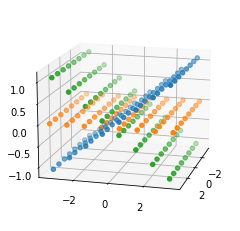

In [5]:
n, m = 8, 8
Q_omega = checkerboard_points(n, m)

R_a = Rotation.from_euler('xyz', [np.pi / 10, 0, 0]).as_matrix()
R_c = Rotation.from_euler('xyz', [- np.pi / 10, 0, 0]).as_matrix()

Q_a = np.vstack((
    R_a @ Q_omega,
    np.ones(n * m)
))
Q_b = np.vstack((
    Q_omega,
    np.ones(n * m)
))
Q_c = np.vstack((
    R_c @ Q_omega,
    np.ones(n * m)
))

Q_omega = np.vstack((
    Q_omega,
    np.ones(n * m)
))


fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(Q_a[0], Q_a[1], Q_a[2])
ax.scatter(Q_b[0], Q_b[1], Q_b[2])
ax.scatter(Q_c[0], Q_c[1], Q_c[2])
ax.view_init(15, 15)
fig.savefig('ex4_plot1.jpg', dpi=500)

q_a = P @ Q_a
q_b = P @ Q_b
q_c = P @ Q_c
qs = [q_a, q_b, q_c]


## Zhangs Method
## Exercise 4.5
Define a function estimateHomographies(Q_omega, qs). The function should return the homographies that map from Q_omega to each of the entries in qs. The homographies should work as follows:
$$
\boldsymbol{q}=H \tilde{\boldsymbol{Q}}_{\Omega}
$$
where $\tilde{\boldsymbol{Q}}_{\Omega}$ is $\boldsymbol{Q}_{\Omega}$ without the $z$-coordinate, in homogeneous coordinates. Remember that we need multiple orientations of checkerboards e.g. rotated and translated.

Use your function hest from week 2 to estimate the individual homographies. Your should return a list of homographies; one homography for each checkerboard orientation.

Test your function using $\boldsymbol{Q}_{\Omega}, \boldsymbol{q}_{a}, \boldsymbol{q}_{b}$, and $\boldsymbol{q}_{c}$. Check that the estimated homographies are correct with Equation 13 .

In [6]:
Hs = estimateHomographies(Q_omega, qs)
print(Hs)
H_a, H_b, H_c = Hs

# CHECK THE CORRECTNESS OF HOMOGRAPHIES
tilde = [0, 1, 3]
a = (np.round(H_a @ Q_omega[tilde] - q_a, 7) == 0).all()
b = (np.round(H_b @ Q_omega[tilde] - q_b, 7) == 0).all()
c = (np.round(H_c @ Q_omega[tilde] - q_c, 7) == 0).all()
a, b, c

[array([[ 7.07106781e+01, -3.75842197e+01,  9.60000000e+02],
       [ 7.07106781e+01,  8.39367689e+01,  5.40000000e+02],
       [-1.71103249e-15,  3.09016994e-02,  1.00000000e+00]]), array([[ 7.07106781e+01, -7.07106781e+01,  9.60000000e+02],
       [ 7.07106781e+01,  7.07106781e+01,  5.40000000e+02],
       [-1.71983303e-15,  1.33047028e-15,  1.00000000e+00]]), array([[ 7.07106781e+01, -9.69154827e+01,  9.60000000e+02],
       [ 7.07106781e+01,  5.05629335e+01,  5.40000000e+02],
       [-1.73150171e-15, -3.09016994e-02,  1.00000000e+00]])]


(True, True, True)

## Exercise 4.6
Now, define a function estimate_b(Hs) that takes a list of homographies Hs and returns the vector $\boldsymbol{b}$ from Equation 6 in the paper. Use Equations 8 and 9 in the paper to form the matrix $\boldsymbol{V}$. This is the coefficient matrix used to estimate $\boldsymbol{b}$ using SVD.

Test your function with the homographies from previous exercise. See if you get the same result as by constructing $\boldsymbol{B}_{\text {true }}=\boldsymbol{K}^{-\mathrm{T}} \boldsymbol{K}^{-1}$, and converting this into $\boldsymbol{b}_{\text {true }}$.
Is $\boldsymbol{b}$ a scaled version of $\boldsymbol{b}_{\text {true }}$ ?
Suggestions for debugging:
- Check that $\boldsymbol{v}_{11} \cdot \boldsymbol{b}_{\text {true }}=\boldsymbol{h}_{1}^{\mathrm{T}} \boldsymbol{B}_{\text {true }} \boldsymbol{h}_{1}$

In [7]:
B_true = np.linalg.inv(K).T @ np.linalg.inv(K)
print("B_true")
print(B_true)
b_true = [
    B_true[0, 0],
    B_true[0, 1],
    B_true[1, 1],
    B_true[0, 2],
    B_true[1, 2],
    B_true[2, 2]
]
b_true = b_true/b_true[-1] - estimate_b([H_a, H_b, H_c])
print("b_true")
print(b_true)

b = estimate_b([H_a, H_b, H_c])
B = np.array([
    [b[0], b[1], b[3]],
    [b[1], b[2], b[4]],
    [b[3], b[4], b[5]],
])
print("B")
print(B)

B_true
[[ 1.0000e-06  0.0000e+00 -9.6000e-04]
 [ 0.0000e+00  1.0000e-06 -5.4000e-04]
 [-9.6000e-04 -5.4000e-04  2.2132e+00]]
b_true
[ 5.59552703e-14 -6.85117276e-22  5.59552724e-14 -5.37170686e-11
 -3.02158479e-11  1.23840221e-07]
B
[[ 4.51834392e-07  6.85117276e-22 -4.33761016e-04]
 [ 6.85117276e-22  4.51834392e-07 -2.43990572e-04]
 [-4.33761016e-04 -2.43990572e-04  9.99999876e-01]]


## Exercise 4.7
Next, define a function estimateIntrisics(Hs) that takes a list of homographies Hs and returns a camera matrix $\boldsymbol{K}$. Use your estimate_b from the previous exercise. From $\boldsymbol{b}$, estimate the camera matrix $\boldsymbol{K}$ (they use $\boldsymbol{A}$ in the paper). Find the solution in Appendix B from the paper.
Test your function with the homographies from Exercise 4.5. Do you get the original camera matrix?

In [8]:
np.rint(estimateIntrinsics(Hs))

array([[1000.,   -0.,  960.],
       [   0., 1000.,  540.],
       [   0.,    0.,    1.]])

## Exercise 4.8
Now, define a function Rs, ts = estimateExtrinsics (K, Hs) that takes the camera matrix $\boldsymbol{K}$ and the homographies Hs and returns the rotations Rs and translations ts of each checkerboard. Use the formulas given in the paper but you do not need to bother with Appendix C we can live with the error.
What kind of rotations do you get, and are they valid?
Join the functions to make a larger function $K, R_{s}, t s=c a l i b r a t e c a m e r a(q s, Q)$ that finds the camera intrinsics and extrinsics from the checkerboard correspondences $q$ and $Q$.

In [9]:
K, Rs, ts = calibrateCamera(qs, Q_omega)
print(K,Rs,ts)
# print(np.round(R_a, 2))
# print(np.round(Rs[0], 2))
# print(np.linalg.norm(Rs[0], axis=0))
# print(np.round(Rs[1], 2))
# print(np.round(R_c, 2))
# print(np.round(Rs[2], 2))
# print(ts[0])

[[ 1.00000000e+03 -1.51630174e-12  9.60000000e+02]
 [ 0.00000000e+00  1.00000000e+03  5.40000000e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]] [array([[ 7.07106781e-01, -6.72498512e-01,  2.18508012e-01],
       [ 7.07106781e-01,  6.72498512e-01, -2.18508012e-01],
       [-1.71103249e-14,  3.09016994e-01,  9.51056516e-01]]), array([[ 7.07106781e-01, -7.07106781e-01,  2.15689015e-14],
       [ 7.07106781e-01,  7.07106781e-01,  2.75321045e-15],
       [-1.71983303e-14,  1.33047028e-14,  1.00000000e+00]]), array([[ 7.07106781e-01, -6.72498512e-01, -2.18508012e-01],
       [ 7.07106781e-01,  6.72498512e-01,  2.18508012e-01],
       [-1.73150171e-14, -3.09016994e-01,  9.51056516e-01]])] [array([[2.07833750e-13],
       [3.01980663e-14],
       [1.00000000e+01]]), array([[2.07833750e-13],
       [3.01980663e-14],
       [1.00000000e+01]]), array([[2.06057393e-13],
       [3.01980663e-14],
       [1.00000000e+01]])]
